Weather data for faya:
{
    "coord": {
        "lon": 42.4509,
        "lat": 18.3851
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 287.44,
        "feels_like": 285.5,
        "temp_min": 285.21,
        "temp_max": 287.44,
        "pressure": 1019,
        "humidity": 22,
        "sea_level": 1019,
        "grnd_level": 791
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.32,
        "deg": 95,
        "gust": 2.93
    },
    "clouds": {
        "all": 0
    },
    "dt": 1696303215,
    "sys": {
        "type": 1,
        "id": 7396,
        "country": "SA",
        "sunrise": 1696302051,
        "sunset": 1696345065
    },
    "timezone": 10800,
    "id": 110690,
    "name": "Faya",
    "cod": 200
}Weather data for jamestown:
{
    "coord": {
        "lon": -79.2353,
        "lat": 42.097
   

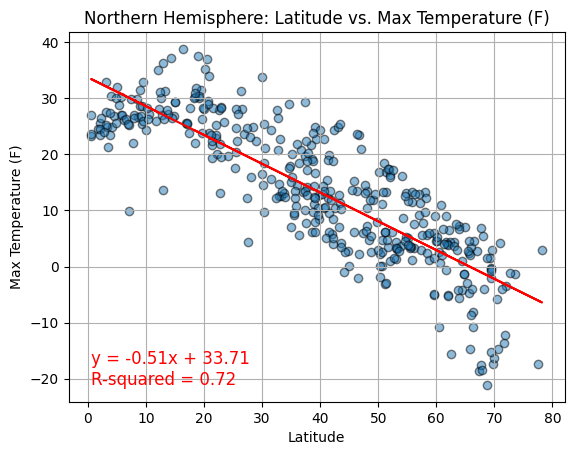

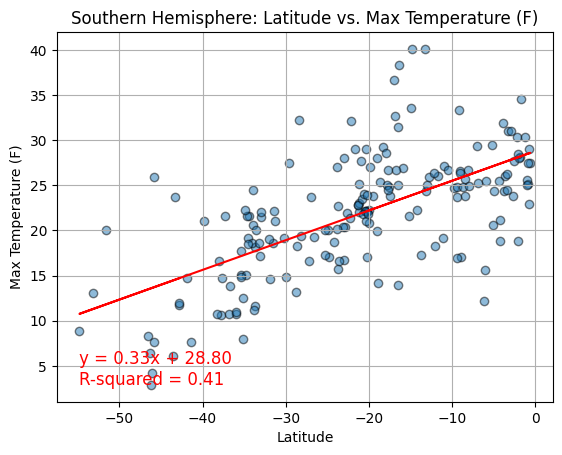

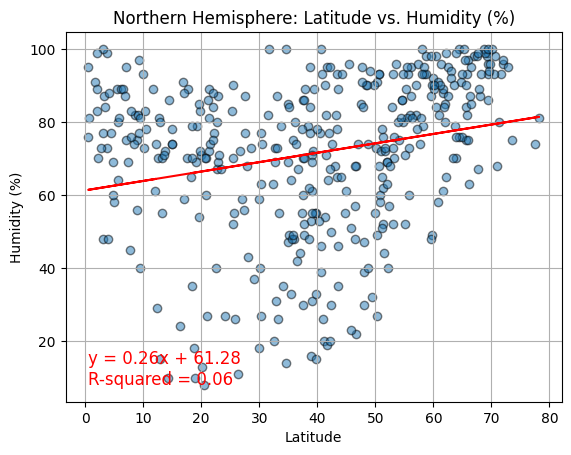

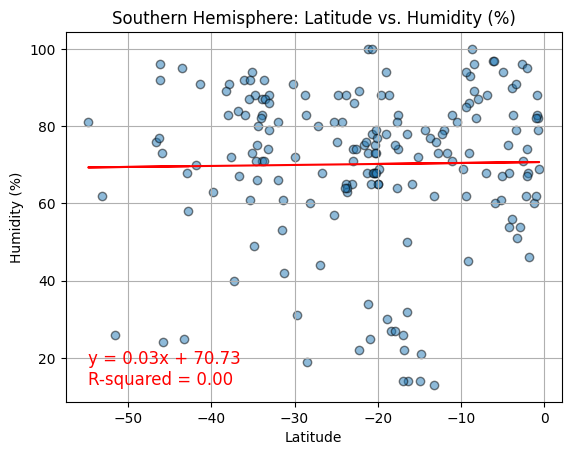

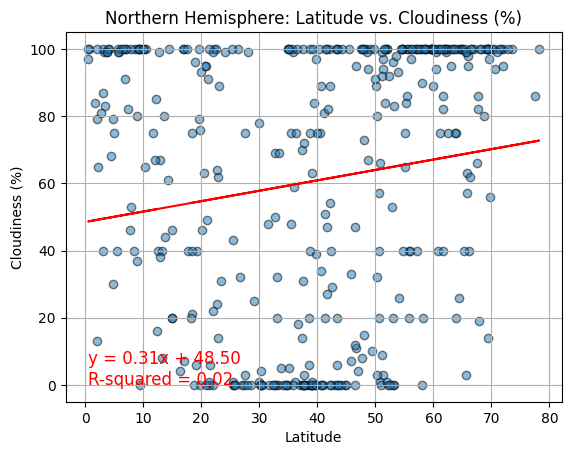

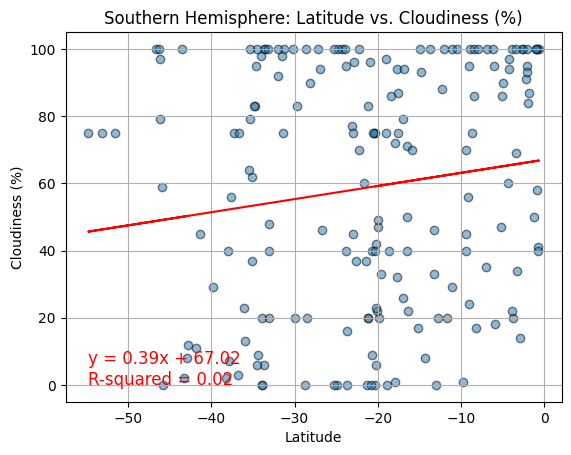

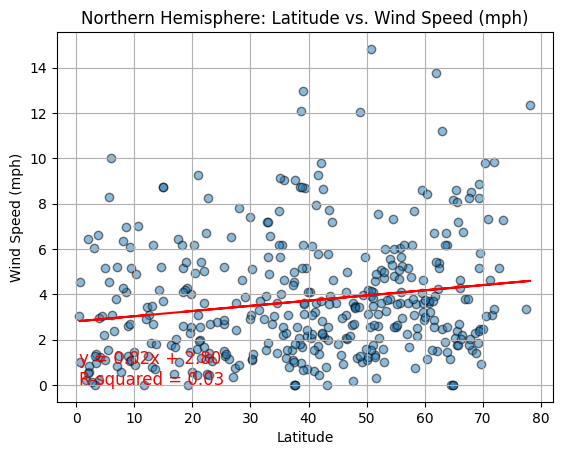

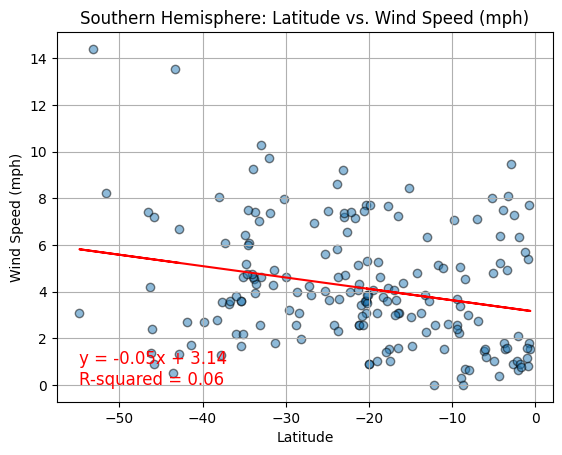

In [3]:
import pandas as pd
import requests
import json
import concurrent.futures
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the cities from the CSV file
cities_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/python-api-challenge/main/output_data/cities.csv')

# OpenWeatherMap API key
api_key = "0864abc0c355428c6394c836ef717070"

# Function to get weather data for a city
def get_weather_data(city_name):
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city_name,
        "appid": api_key
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Define a function to process each city
def process_city(city_name):
    weather_data = get_weather_data(city_name)
    if weather_data:
        print(f"Weather data for {city_name}:\n{json.dumps(weather_data, indent=4)}")
    else:
        print(f"Failed to retrieve weather data for {city_name}")

# Use concurrent.futures to parallelize the API requests
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:  # You can adjust max_workers as needed
    futures = {executor.submit(process_city, city): city for city in cities_df['City']}

# Function to create scatter plot and perform linear regression
def plot_and_regression(x_values, y_values, x_label, y_label, hemisphere):
    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black', alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{hemisphere} Hemisphere: {x_label} vs. {y_label}')

    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}'
    
    # Plot regression line and equation
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')

    # Display and save the plot
    plt.grid()
    plt.savefig(f'{hemisphere.lower()}_{x_label.lower()}_{y_label.lower()}_scatter.png')
    plt.show()

# Separate data into Northern and Southern Hemispheres
northern_df = cities_df[cities_df['Lat'] >= 0]
southern_df = cities_df[cities_df['Lat'] < 0]

# Create scatter plots for each relationship in both hemispheres
plot_and_regression(northern_df['Lat'], northern_df['Max Temp'], 'Latitude', 'Max Temperature (F)', 'Northern')
plot_and_regression(southern_df['Lat'], southern_df['Max Temp'], 'Latitude', 'Max Temperature (F)', 'Southern')

plot_and_regression(northern_df['Lat'], northern_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern')
plot_and_regression(southern_df['Lat'], southern_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern')

plot_and_regression(northern_df['Lat'], northern_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern')
plot_and_regression(southern_df['Lat'], southern_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern')

plot_and_regression(northern_df['Lat'], northern_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Northern')
plot_and_regression(southern_df['Lat'], southern_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Southern')
